### Custom Vision Object Detection
#### Detect Red or White Wine

In [ ]:
!pip install azure.cognitiveservices.vision.customvision

In [35]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
import matplotlib.pyplot as plt
import json
import cv2

%matplotlib inline

config = json.load(open("config.json"))

endpoint = config["endpoint"]

In [36]:
# Gets prediction based off a confidence level
def append_predictions(result, confidence_level = 0.75):
    predictions = []
    for prediction in result.predictions:
        if prediction.probability > confidence_level:
            predictions.append(prediction)
            print(prediction.probability, prediction.tag_name)
            
    return predictions

# Adds border box and text on images based off predictions
# Custom Vision gives bounding box as noramlized coordinates 
# so they need to be computed to X, Y, Width, and Height that
# Open CV uses
def add_boxes_to_images(img, predictions):
    for pred in predictions:
        x = int(pred.bounding_box.left * img.shape[0])
        y = int(pred.bounding_box.top * img.shape[1])

        width = x + int(pred.bounding_box.width * img.shape[0])
        height = y + int(pred.bounding_box.height * img.shape[1])

        img = cv2.rectangle(img, (x, y), (width, height), (0, 0, 255), 2)

        img = cv2.putText(img, pred.tag_name, (x + 5, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 1, cv2.LINE_AA, False)

# Shows the image
def show_inline_img(img):
    inline_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 20))
    plt.axis('off')
    
    plt.imshow(inline_img)

In [37]:
train = CustomVisionTrainingClient(config["trainingKey"], endpoint=endpoint)

predict = CustomVisionPredictionClient(config["predictionKey"], endpoint=endpoint)

In [38]:
projects = train.get_projects()

In [39]:
project = None

for p in projects:
    if p.name == "wine":
        project = p

In [40]:
iterations = train.get_iterations(project.id)

In [41]:
train.publish_iteration(project.id, iterations[0].id, "wineDetect", config["predictionId"])

True

In [42]:
with open("./red-test.jpg", mode="rb") as image_data:
    red_wine_result = predict.detect_image(project.id, "wineDetect", image_data)

In [43]:
predictions = append_predictions(red_wine_result)

0.977486849 red


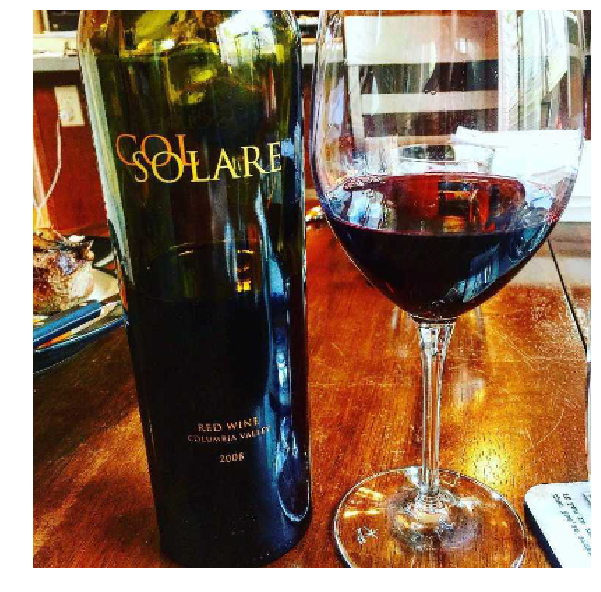

In [44]:
img = cv2.imread("./red-test.jpg", cv2.IMREAD_COLOR)

img = cv2.resize(img, (400, 400))
img.shape

show_inline_img(img)

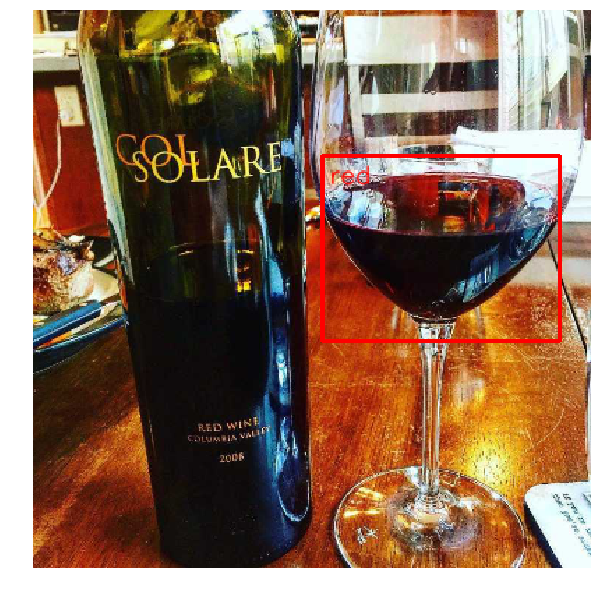

In [45]:
add_boxes_to_images(img, predictions)

show_inline_img(img)

In [46]:
with open("./white.jpg", mode="rb") as image_data:
    white_wine_result = predict.detect_image(project.id, "wineDetect", image_data)

In [47]:
predictions = append_predictions(white_wine_result)

0.988751054 white


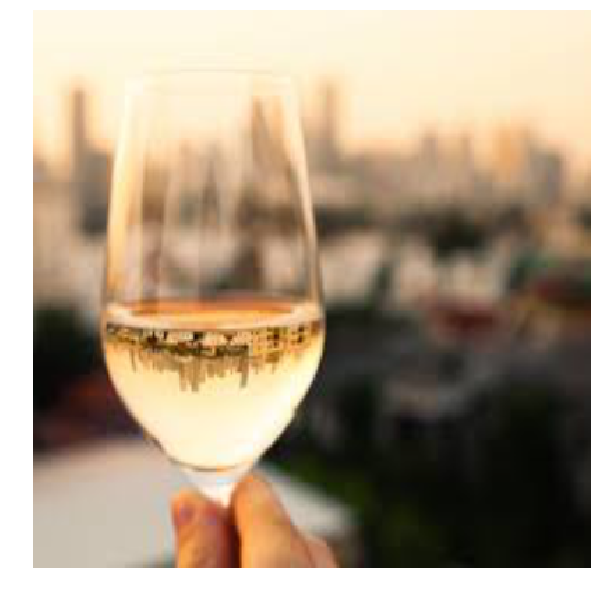

In [48]:
img = cv2.imread("./white.jpg", cv2.IMREAD_COLOR)

img = cv2.resize(img, (400, 400))
img.shape

show_inline_img(img)

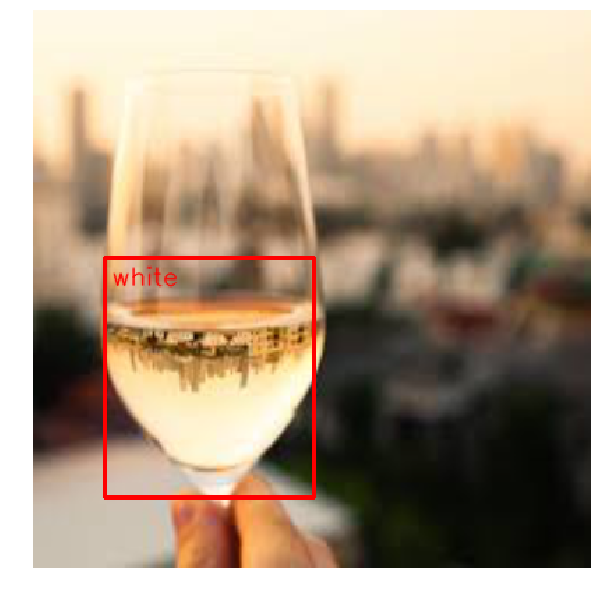

In [49]:
add_boxes_to_images(img, predictions)

show_inline_img(img)